# Aligned SOMs Evaluation on Chainlink Dataset

**Authors:**   
Markus Kiesel (01228952)   
Alexander Melem(11809621)   
Laurenz Ruzicka (01619916)   

In [15]:
import os, sys
import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
  sys.path.append(module_path)

from src.data import load_dataset
from src.config import config
from src.aligned_som import AlignedSom
from src.visualize import plot_aligned_som

DATASET_NAME = 'chainlink'

In [24]:
def setup(som_dim, num_layers, aspect_selection,
          sigma=1.0,
          learning_rate=0.5,
          layer_distance_ratio=0.1,
          num_plots=5,
          train_steps_by_layer=1000,
          random_seed=config.SEED,
          load_existing=True):

    input_data, components, weights, classinfo = load_dataset(DATASET_NAME)
    data = input_data['arr']
    aspect_selection = np.array(aspect_selection)
   
    asom = AlignedSom(
        som_dim, data, aspect_selection,
        num_layers=num_layers,
        sigma=sigma,
        learning_rate=learning_rate,
        layer_distance_ratio=layer_distance_ratio,
        random_seed=random_seed)
    
    os.makedirs("../results", exist_ok=True)
    if load_existing and os.path.exists(f"../results/chainlink_setup_{som_dim[0]}_{som_dim[1]}_{num_layers}_{sigma}_{layer_distance_ratio}_{learning_rate}_{'-'.join([str(c) for c in aspect_selection])}.npy"):
        asom.set_layer_weights(np.load(f"../results/chainlink_setup_{som_dim[0]}_{som_dim[1]}_{num_layers}_{sigma}_{layer_distance_ratio}_{learning_rate}_{'-'.join([str(c) for c in aspect_selection])}.npy"))
    else:
        asom.train(train_steps_by_layer * num_layers)
        np.save(f"../results/chainlink_setup_{som_dim[0]}_{som_dim[1]}_{num_layers}_{sigma}_{layer_distance_ratio}_{learning_rate}_{'-'.join([str(c) for c in aspect_selection])}.npy", np.array(asom.get_layer_weights()))
    
    fig = plot_aligned_som(asom, data, num_plots=num_plots, upscaling_factor=100)
    fig.savefig(f"../results/chainlink_setup_{som_dim[0]}_{som_dim[1]}_{num_layers}_{sigma}_{layer_distance_ratio}_{learning_rate}_{'-'.join([str(c) for c in aspect_selection])}.pdf")
    
    return asom

# Dataset

## todo: small description of dataset

In [25]:
input_data, components, weights, classinfo = load_dataset('10clusters')
data = input_data['arr']
data.shape

(850, 10)

## Alignd SOMs on Chainlink 10x10

In [26]:
SOM_DIM = (10, 10)
N_LAYERS = 31
ASPECT_SELECTION = [1, 1, 0]

### Default Setup

100%|████████████████████████████████████████████████████████████████████████████████| 31000/31000 [00:40<00:00, 770.82it/s]


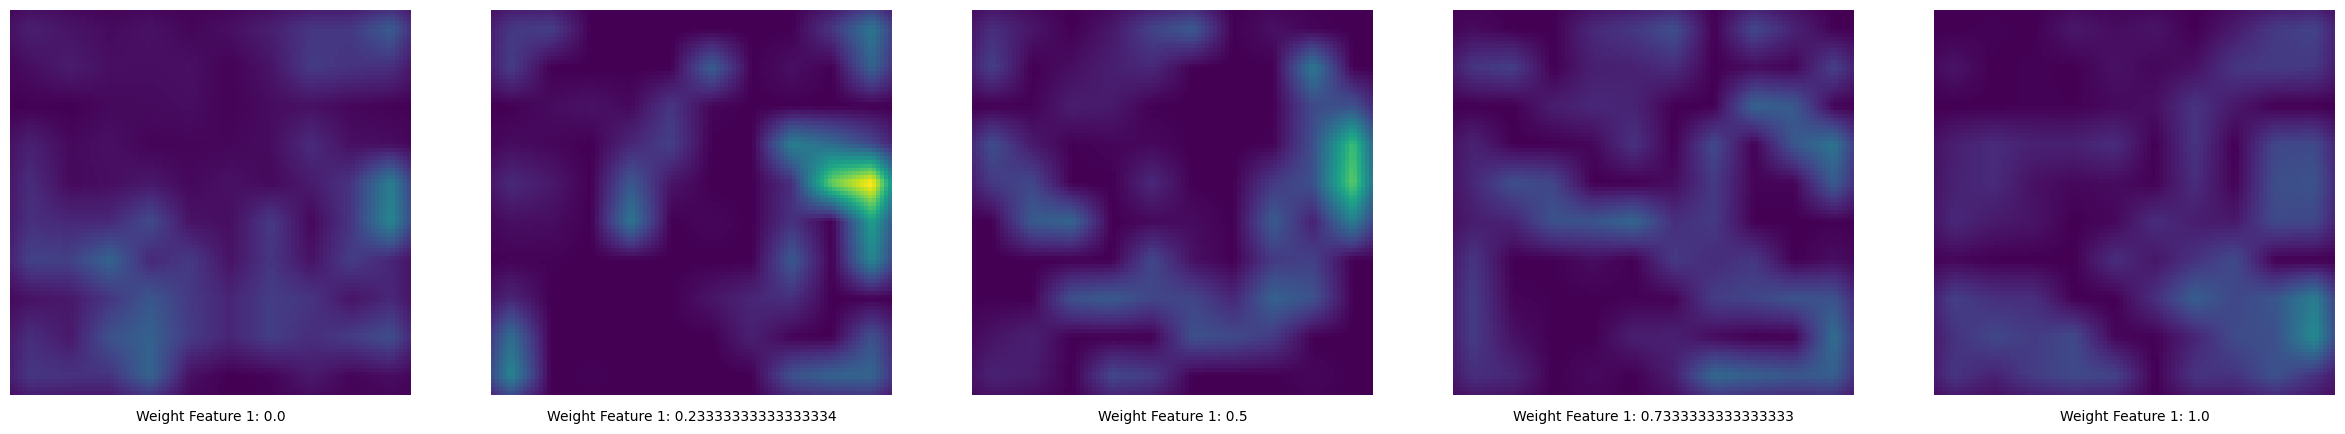

In [27]:
asom_small_1 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION)

### Many In-Between Layers

In [ ]:
som_small_2 = setup(
    som_dim=SOM_DIM,
    num_layers=128,
    aspect_selection=ASPECT_SELECTION)

### Strong Layer-Wise Coupling

In [ ]:
asom_small_3 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION,
    layer_distance_ratio=10)

### Weak Layer-Wise Coupling

In [ ]:
asom_small_4 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION,
    layer_distance_ratio=1e-3)

### Few In-Between Layers

In [ ]:
asom_small_5 = setup(
    som_dim=SOM_DIM,
    num_layers=6,
    aspect_selection=ASPECT_SELECTION)

### Switch Aspect Indices

In [ ]:
asom_small_6 = setup(
    som_dim=SOM_DIM,
    num_layers=6,
    aspect_selection=[0, 0, 1])

### Only Aspect A

In [ ]:
asom_small_7 = setup(
    som_dim=SOM_DIM,
    num_layers=6,
    aspect_selection=[0, 0, 0])

### Only Aspect  B

In [ ]:
asom_small_8 = setup(
    som_dim=SOM_DIM,
    num_layers=6,
    aspect_selection=[1, 1, 1])

## Alignd SOMs on Chainlink 100x60 

In [ ]:
SOM_DIM = (100, 60)
N_LAYERS = 31
ASPECT_SELECTION = [1, 1, 0]

In [ ]:
### Default Setup

In [ ]:
asom_large_1 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION)

In [ ]:
### Many In-Between Layers

In [ ]:
asom_large_2 = setup(
    som_dim=SOM_DIM,
    num_layers=128,
    aspect_selection=ASPECT_SELECTION)

In [ ]:
### Strong Layer-Wise Coupling

In [ ]:
asom_large_3 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION,
    layer_distance_ratio=10)


In [ ]:
### Weak Layer-Wise Coupling

In [ ]:
asom_large_4 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION,
    layer_distance_ratio=1e-3)

In [ ]:
### Few In-Between Layers

In [ ]:
asom_large_5 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=ASPECT_SELECTION,
    num_layers=6)

### Switch Aspect Indices

In [ ]:
asom_large_6 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=[0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

### Only Aspect A

In [ ]:
asom_large_7 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Only Aspect  B

In [ ]:
asom_large_8 = setup(
    som_dim=SOM_DIM,
    num_layers=N_LAYERS,
    aspect_selection=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])